In [5]:
# Asking and answering questions on Quora! 
# A story about a Quora's user writing productivity and topic interests. 

# I have been using Quora since 2015 mainly in its English and Italian version.  I like to write each day 
# one or two answers about topics where I have professional experitise or simple human experience. 
# In about four years of Quora experience I have been writing more than 1500 answers to questions about 
# programming languages such as Java and R, algorithms, data collection and analysis, academic research, cultural aspects of 
# of coutries where I have been living in, intercultural communication and geopolitics.  

# Now, as a data scientist I see the text of my answers as a dataset to analyze. The dataset contains the date in which 
# I wrote those answers, the questions to which I answerd and obviously the text of the answer. So there is a temporal
# dimension (the dates) to analyze and visualize. I also believe that from an NLP perspective, by analyzing 
# the text of my answers there is also a story to uncover an I will tell it with the graphics below. 

# I have extracted some aggregated data about my Quora activity. These aggregated data are given in two files 
# and represent the number of answers per day and the text of the answers which I have cleaned from tags or 
# other unicode characters and is now in lower case ready to be analyzed. 


# The questions I have been asking before analyzing the data are related to the number of questions I wrote per 
# day and how this number is distributed from a temporal perspective and a statistical perspective. I also have 
# been asking questions on what are the most 
# Can you count something interesting? the number of answers per day
 
# Can you find some trends (high, low, increase, decrease, anomalies)? My trend of writting answers 
# is from febbruary to august

# Can you make a bar plot or a histogram?

# Can you compare two related quantities?

# Can you make a scatterplot?

# Can you make a time-series plot?


# The questions you asked
# The trends you investigated
# The resulting visualizations and conclusions.


# import the neccessary libraries
from pandas import read_csv
from matplotlib  import pyplot
from pandas import DataFrame
from pandas import Grouper
from pandas import concat
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud


In [6]:
# here I load the first dataset containing the number of answers I have been answering per day. 
series = read_csv('QuoraAnswersPerDay.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
print(series.head())

date
2015-06-16    25
2015-06-17    20
2015-05-05    17
2015-07-14    17
2017-08-10    16
Name: questions, dtype: int64


In [7]:
# Here is a first summary description of the dataset. There is a max of 25 answers per day (yes, there are some days in 
# which I enjoy to write answers on Quora :-) ) .. and a min of one answer a day. During the overall period I have been 
# writing 3.21 answers per day on average, However the median (or 50% percentile) is equal to 2 answers per day so I 
# would consider that as a more reliable measure. 
print(series.describe())

count    474.000000
mean       3.217300
std        3.154452
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       25.000000
Name: questions, dtype: float64


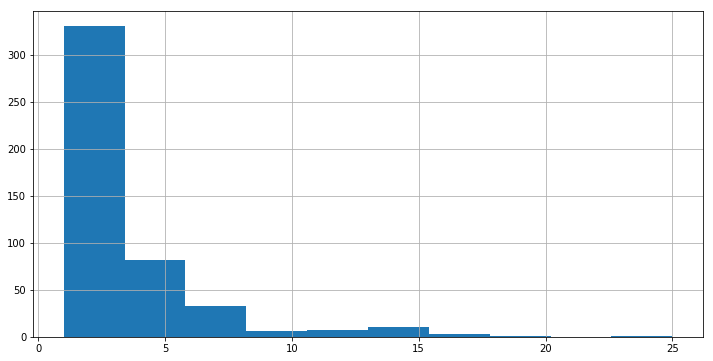

In [8]:
# histogram of how the number of answers per day is distributed
plt.figure(figsize=(12,6))
series.hist()
pyplot.show()

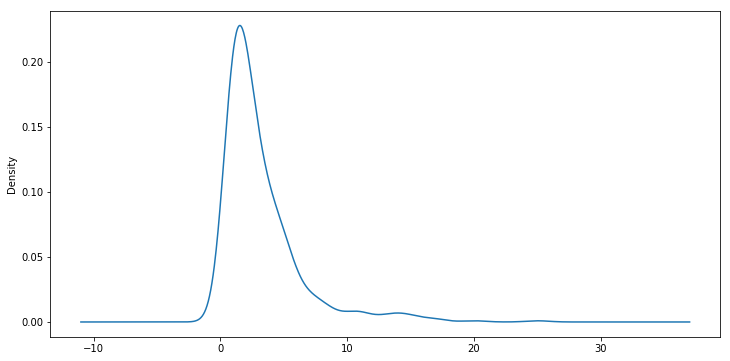

In [9]:
# and here a kernel density plot of how are distrubuted the answers per day
plt.figure(figsize=(12,6))
series.plot(kind='kde')
pyplot.show()  

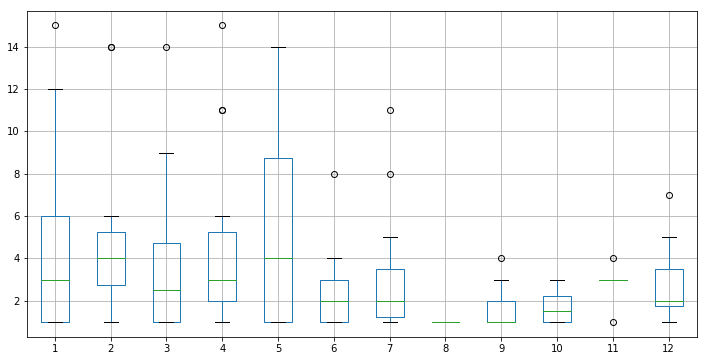

In [10]:
# exploring the data year by year can be seen how during the first half of the year I'm more active with 
# writing answers while in the second half I write less answers per day.  
one_year_2016 = series['2016']
groups = one_year_2016.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
plt.figure(figsize=(12,6))
months.boxplot()
pyplot.show() 

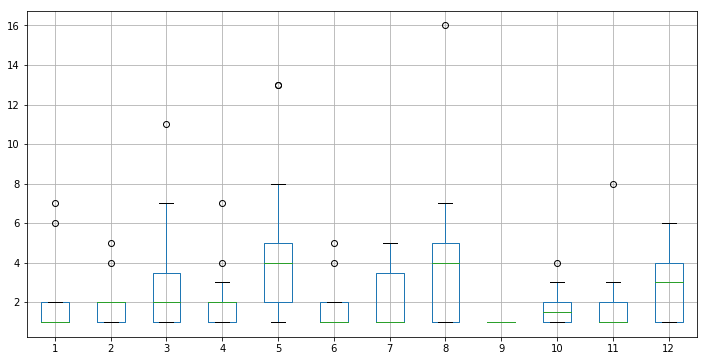

In [11]:
one_year_2017 = series['2017']
groups = one_year_2017.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
plt.figure(figsize=(12,6))
months.boxplot()
pyplot.show() 

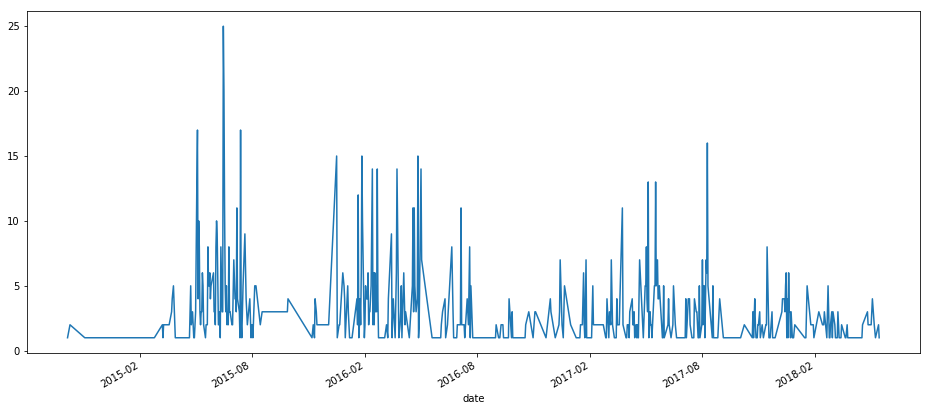

In [34]:
# Here a line graphics of the number of answers per day. A strange pattern that I have noticed is that my whole 
# activity on Quora can be seen as grouped in three periods which are : from 2015-0 to 2015-08, from 2016-02 to 2016-08 
# and 2017-02 to 2017-8 ... there isn't much data yet for 2018 o nothing can be said for it. 

plt.figure(figsize=(16,7))
series.plot()
plt.show()     

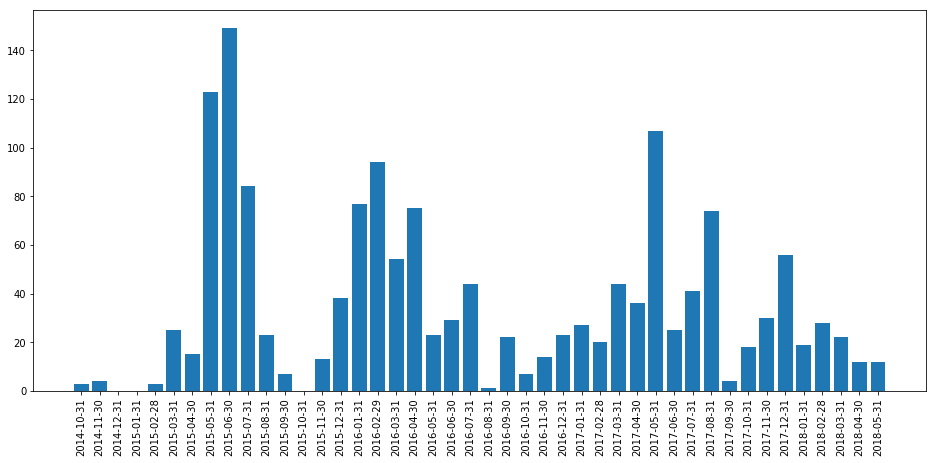

In [33]:
# here I have aggregated the number of answers per month and visualized the data with a simple barchart graohics 
# where the hight of each bar represents the number of answers given in that month. 

import pandas as pd
import numpy as np

dtf = pd.read_csv('NumberOfAnswersPerMonth.csv')
nrAnswers = dtf['nrAnswers'].tolist()

bars2 = ('2014-10-31','2014-11-30','2014-12-31','2015-01-31','2015-02-28','2015-03-31','2015-04-30','2015-05-31',
'2015-06-30','2015-07-31','2015-08-31','2015-09-30','2015-10-31','2015-11-30',
'2015-12-31','2016-01-31','2016-02-29','2016-03-31','2016-04-30','2016-05-31',
'2016-06-30','2016-07-31','2016-08-31','2016-09-30','2016-10-31','2016-11-30','2016-12-31','2017-01-31','2017-02-28',
'2017-03-31','2017-04-30','2017-05-31','2017-06-30','2017-07-31','2017-08-31','2017-09-30','2017-10-31','2017-11-30',
'2017-12-31','2018-01-31','2018-02-28','2018-03-31','2018-04-30','2018-05-31')
plt.figure(figsize=(16,7))
y_pos = np.arange(len(bars2))

# Create bars
plt.bar(y_pos, nrAnswers)
plt.xticks(rotation='vertical')
# Create names on the x-axis
plt.xticks(y_pos, bars2)

# Show graphic
plt.show()

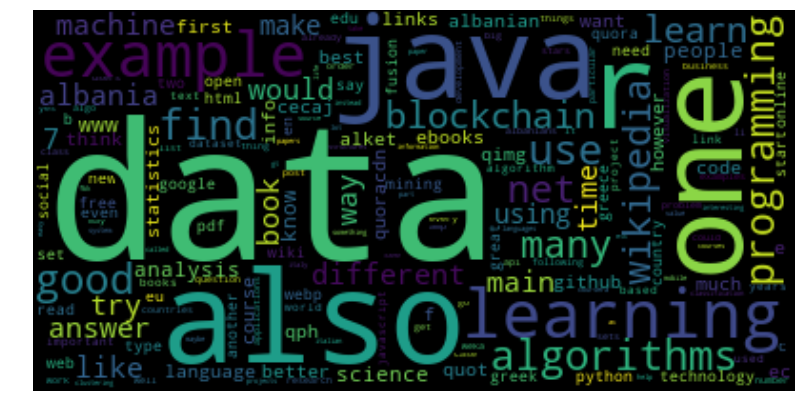

In [35]:
# As for the text of my answers I did a simple word-cloud graphics in order to represent the most 
# frequent words that occour in the text of my answers. The more frequent is a word the largest it will appear in 
# the graphics. As you can see, the most frequent words in my graphics are : "data", "algorithms", "java", "r",
# "machine", "learning", "programming", "blockchain" etc..
# There are also words which are typical of a person's writing style such as "different", "also","many", "good" etc..
 
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
fp = open("QuoraAnswersText.txt")
data = fp.read()

tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(data)

words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

# and print them
sw = nltk.corpus.stopwords.words('english')

# Initialize new list that will contain text without stop words
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)

# here I add a word cloud graphics which shows the most common words

wcloud = WordCloud().generate_from_frequencies(freqdist1)
plt.figure(figsize=(16,7))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()    